# 1. Working with RDD (25	%) 
In this section, you will need to create RDDs from the given datasets, perform partitioning in these RDDs and use various RDD operations to answer the queries for crash analysis. 


# 1.1 Data Preparation and Loading (5 %) 
1.	Write the code to create a SparkContext object using SparkSession, which tells Spark how to access a cluster. To create a SparkSession you first need to build a SparkConf object that contains information about your application. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine. 
2.	Import all the “Units” csv files from 2015-2019 into a single RDD.  
3.	Import all the “Crashes” csv files from 2015-2019 into a single RDD. 
4.	For each Units and Crashes RDDs, remove the header rows and  display the total count and first 10 records. 
 Hint :  You can use csv.reader to parse rows in RDDs. 


In [1]:
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession
master = "local[*]"
app_name = "Assignment-1"
spark_conf = SparkConf().setMaster(master).setAppName(app_name)
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')


In [2]:
temp_rdd_unit = sc.textFile('*Units.csv')
header_units = temp_rdd_unit.first()
rdd_units = temp_rdd_unit.filter(lambda x:x !=header_units)
rdd_units = rdd_units.map(lambda x:x.replace('\"',''))

print(rdd_units.count())
rdd_units.take(10)

153854


['2016-1-15/08/2019,01,0,SA,OMNIBUS,2011,North,Male,056,SA,HR,Full,Not Towing,Straight Ahead,010,5121,,',
 '2016-1-15/08/2019,02,1,,Pedestrian on Road,,East,Male,072,,,,,Walking on Road,,5084,,',
 '2016-2-15/08/2019,01,0,SA,Motor Cars - Sedan,2004,Unknown,Female,023,SA,C ,Full,Not Towing,Straight Ahead,001,5087,,',
 '2016-2-15/08/2019,02,0,SA,Station Wagon,2008,Unknown,Male,040,SA,C ,Full,Not Towing,Straight Ahead,001,5084,,',
 '2016-3-15/08/2019,01,0,SA,RIGID TRUCK LGE GE 4.5T,1990,South,Unknown,XXX,SA,MR,Provisional 2,Not Towing,Straight Ahead,001,5115,,',
 '2016-3-15/08/2019,02,0,SA,Panel Van,2013,South,Male,023,SA,C ,Full,Not Towing,Straight Ahead,001,5110,,',
 '2016-4-15/08/2019,01,0,SA,Station Wagon,2002,East,Female,033,SA,C ,Full,Not Towing,Straight Ahead,001,5169,,',
 '2016-4-15/08/2019,02,0,UNKNOWN,Other Defined Special Vehicle,XXXX,North,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Reversing,001,XXXX,,',
 '2016-5-15/08/2019,01,1,SA,Motor Cars - Sedan,1997,South East,Male,042,SA,C ,

In [3]:
temp_rdd_crash = sc.textFile('*Crash.csv')
header_crash = temp_rdd_crash.first()
rdd_crash = temp_rdd_crash.filter(lambda x:x !=header_crash)
rdd_crash = rdd_crash.map(lambda x:x.replace('\"',''))
print(rdd_crash.count())
rdd_crash.take(10)

72006


['2019-1-8/07/2020,2 Metropolitan,HAMPSTEAD GARDENS,5086,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,2019,June,Wednesday,11:15 am,060,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,01,Driver Rider,1: PDO,Give Way Sign,,,1331810.03,1676603.26,13318101676603',
 '2019-2-8/07/2020,2 Metropolitan,DRY CREEK,5094,CITY OF SALISBURY,2,0,0,0,0,2019,January,Tuesday,12:49 am,090,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Rear End,02,Driver Rider,1: PDO,No Control,,,1328376.2,1682942.63,13283761682943',
 '2019-3-8/07/2020,2 Metropolitan,MILE END,5031,CITY OF WEST TORRENS,2,1,0,0,1,2019,January,Tuesday,12:00 am,060,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Pedestrian,01,Driver Rider,2: MI,No Control,,,1325819.68,1670994.26,13258201670994',
 '2019-4-8/07/2020,2 Metropolitan,PARALOWIE,5108,CITY OF SALISBURY,2,1,0,1,0,2019,January,Tuesday,12:05 am,050,Not Divided,CURVED, VIEW OPEN,Level,Not A

# 1.2 Data Partitioning in RDD (10	%) 
1.	How many partitions do the above RDDs have? How is the data in these RDDs partitioned by default, when we do not explicitly specify any partitioning strategy? 

 each RDDS has 5 partitions.when we do not explicitly specify any partitioning strategy,it will partition according to the amount of data. If it has few data, it may have 1 partitioning.

In [4]:
print('units\' rdd participations:',rdd_units.getNumPartitions())
print('crash\'s rdd participations:',rdd_crash.getNumPartitions())

units' rdd participations: 5
crash's rdd participations: 5


2.	In the “Units” csv dataset, there is a column called Lic State which shows the state where the vehicle is registered. Assume we want to keep all the data related to SA in one partition and the rest of the data in another partition.  
a.	Create a Key Value Pair RDD with Lic State as the key and rest of the other columns as value. 


In [5]:
rdd_units_tuple = rdd_units.map(lambda x:x.split(',')).map(lambda x:(x[9],x[0:9]+x[10:]))
rdd_units_tuple.take(10)

[('SA',
  ['2016-1-15/08/2019',
   '01',
   '0',
   'SA',
   'OMNIBUS',
   '2011',
   'North',
   'Male',
   '056',
   'HR',
   'Full',
   'Not Towing',
   'Straight Ahead',
   '010',
   '5121',
   '',
   '']),
 ('',
  ['2016-1-15/08/2019',
   '02',
   '1',
   '',
   'Pedestrian on Road',
   '',
   'East',
   'Male',
   '072',
   '',
   '',
   '',
   'Walking on Road',
   '',
   '5084',
   '',
   '']),
 ('SA',
  ['2016-2-15/08/2019',
   '01',
   '0',
   'SA',
   'Motor Cars - Sedan',
   '2004',
   'Unknown',
   'Female',
   '023',
   'C ',
   'Full',
   'Not Towing',
   'Straight Ahead',
   '001',
   '5087',
   '',
   '']),
 ('SA',
  ['2016-2-15/08/2019',
   '02',
   '0',
   'SA',
   'Station Wagon',
   '2008',
   'Unknown',
   'Male',
   '040',
   'C ',
   'Full',
   'Not Towing',
   'Straight Ahead',
   '001',
   '5084',
   '',
   '']),
 ('SA',
  ['2016-3-15/08/2019',
   '01',
   '0',
   'SA',
   'RIGID TRUCK LGE GE 4.5T',
   '1990',
   'South',
   'Unknown',
   'XXX',
   'MR',
   'P

b.	Write the code to implement this partitioning in RDD using appropriate partitioning functions. 

In [8]:
def function(key):
    if key == 'SA':
        return 0
    else:    
        return 1

partitioned_rdd = rdd_units_tuple.partitionBy(2, function)
print_partitions(partitioned_rdd)


####### NUMBER OF PARTITIONS: 2
Partition 0: 109684 records
Partition 1: 44170 records



c.	Write the code to print the number of records in each partition. What does it tell about the data skewness? 

In [7]:
from pyspark.rdd import RDD
file = open('result1.txt','w')
def print_partitions(data):
    numPartitions = data.getNumPartitions()
    partitions = data.glom().collect()   
    file.writelines(f"####### NUMBER OF PARTITIONS: {numPartitions}"+'\n')
    print(f"####### NUMBER OF PARTITIONS: {numPartitions}")
    for index, partition in enumerate(partitions):
        if len(partition) > 0:
            file.writelines(f"Partition {index}: {len(partition)} records"+'\n')
            file.writelines(str(partition)+'\n') 
            print(f"Partition {index}: {len(partition)} records")
    file.close()

In [ ]:
high skewness

# 1.3 Query/Analysis (10	%) 
For the Units	 RDD, write relevant RDD operations to answer the following queries.	 

1.	Find the average age of male and female drivers separately.

In [9]:
temp = rdd_units.map(lambda x:x.split(','))\
    .filter(lambda x:(x[7] == 'Male' or x[7] == 'Female')and x[8]!='XXX'and x[8]!='')\
    .map(lambda x:(x[7],int(x[8])))
count = sc.broadcast(temp.countByKey())

reausle = temp.reduceByKey(lambda x,y:(x+y))\
    .map(lambda x:(x[0],(x[1]/count.value[x[0]])))
reausle.take(10)



[('Male', 40.975960299920004), ('Female', 40.38729268862415)]

2.	What is the oldest and the newest vehicle year involved in the accident? Display the Registration State, Year and Unit type of the vehicle. 

In [10]:
temp = rdd_units.map(lambda x:x.split(',')).filter(lambda x:x[5]!='XXXX' and x[5]!='').min(lambda x:x[5])
rdd_oldest = rdd_units.map(lambda x:x.split(',')).map(lambda field: (field[3],field[4],field[5])).filter(lambda x:x[2]==temp[5])
rdd_oldest.take(10)

[('VIC', 'Motor Cycle', '1900'),
 ('SA', 'Motor Cycle', '1900'),
 ('SA', 'Motor Cycle', '1900'),
 ('SA', 'Motor Cycle', '1900'),
 ('SA', 'Motor Cycle', '1900'),
 ('SA', 'Motor Cycle', '1900'),
 ('SA', 'Motor Cycle', '1900'),
 ('SA', 'RIGID TRUCK LGE GE 4.5T', '1900'),
 ('SA', 'Motor Cycle', '1900'),
 ('SA', 'Motor Cycle', '1900')]

In [11]:
temp = rdd_units.map(lambda x:x.split(',')).filter(lambda x:x[5]!='XXXX' and x[5]!='').max(lambda x:x[5])
rdd_newest = rdd_units.map(lambda x:x.split(',')).map(lambda field: (field[3],field[4],field[5])).filter(lambda x:x[2]==temp[5])
rdd_newest.take(10)

[('SA', 'Station Wagon', '2019'),
 ('SA', 'OMNIBUS', '2019'),
 ('SA', 'Motor Cars - Sedan', '2019'),
 ('SA', 'Station Wagon', '2019'),
 ('SA', 'SEMI TRAILER', '2019'),
 ('SA', 'Motor Cars - Sedan', '2019'),
 ('SA', 'Motor Cars - Sedan', '2019'),
 ('VIC', 'Station Wagon', '2019'),
 ('SA', 'Station Wagon', '2019'),
 ('SA', 'Utility', '2019')]

# 2. Working with DataFrames (35	%) 
In this section, you will need to load the given datasets into PySpark DataFrames and use 
DataFrame functions to answer the queries. 


# 2.1 Data Preparation and Loading (5 %) 
1.	Load all units and crash data into two separate dataframes. 
2.	Display the schema of the final two dataframes. 


In [12]:
from pyspark.sql.functions import col
import pyspark.sql.functions as F
df_units = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('*Units.csv')
df_crash = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('*Crash.csv')
df_units.printSchema()
df_crash.printSchema()

root
 |-- REPORT_ID: string (nullable = true)
 |-- Unit No: string (nullable = true)
 |-- No Of Cas: string (nullable = true)
 |-- Veh Reg State: string (nullable = true)
 |-- Unit Type: string (nullable = true)
 |-- Veh Year: string (nullable = true)
 |-- Direction Of Travel: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Lic State: string (nullable = true)
 |-- Licence Class: string (nullable = true)
 |-- Licence Type: string (nullable = true)
 |-- Towing: string (nullable = true)
 |-- Unit Movement: string (nullable = true)
 |-- Number Occupants: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- Rollover: string (nullable = true)
 |-- Fire: string (nullable = true)

root
 |-- REPORT_ID: string (nullable = true)
 |-- Stats Area: string (nullable = true)
 |-- Suburb: string (nullable = true)
 |-- Postcode: string (nullable = true)
 |-- LGA Name: string (nullable = true)
 |-- Total Units: string (nullable = true)


# 2.2 Query/Analysis (15	%) 
Implement the following queries using dataframes. You need to be able to perform operations like filtering, sorting, joining and group by using the functions provided by the DataFrame API.  
1.	Find all the crash events in Adelaide where the total number of casualties in the event is more than 3. 

In [13]:
df_crash.filter((col('Total Cas')>3) & (col('Suburb')=='ADELAIDE')).show()

+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+----------------+--------------+--------------------+------------+-------------+------------+--------+--------------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|Stats Area|  Suburb|Postcode|        LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|     Day|    Time|Area Speed|Position Type|Horizontal Align|Vertical Align|          Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight|    Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+----------+--------+--------+----------------+-----------+---------+----------+--------+--------+----+--------+--------+--------+----------+-------------+

2.Display 10 crash events with highest casualties 

In [14]:
df_crash.sort('Total Cas',ascending=False).show(10)

+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+---------+--------+----------+-------------+--------------------+--------------+--------------+------------+-------------+------------+--------+-----------+---------+------------+-------------+---------------+------------+--------------+----------+----------+--------------+
|           REPORT_ID|    Stats Area|         Suburb|Postcode|            LGA Name|Total Units|Total Cas|Total Fats|Total SI|Total MI|Year|   Month|      Day|    Time|Area Speed|Position Type|    Horizontal Align|Vertical Align|    Other Feat|Road Surface|Moisture Cond|Weather Cond|DayNight| Crash Type|Unit Resp| Entity Code|CSEF Severity|  Traffic Ctrls|DUI Involved|Drugs Involved|  ACCLOC_X|  ACCLOC_Y|    UNIQUE_LOC|
+--------------------+--------------+---------------+--------+--------------------+-----------+---------+----------+--------+--------+----+--------+------

3.Find the total number of fatalities for each crash type.

In [15]:
df_crash.groupby('Crash Type')\
        .agg(F.sum('Total Cas').alias('Total')).show()

+--------------------+------+
|          Crash Type| Total|
+--------------------+------+
|           Roll Over|2279.0|
|  Hit Object on Road|  85.0|
|      Hit Pedestrian|1517.0|
|    Hit Fixed Object|4502.0|
|               Other| 154.0|
|          Side Swipe|1992.0|
|             Head On|1224.0|
|  Hit Parked Vehicle|1133.0|
|          Right Turn|3120.0|
|            Rear End|8605.0|
|          Hit Animal| 207.0|
|Left Road - Out o...| 244.0|
|         Right Angle|6555.0|
+--------------------+------+



4.Find the total number of casualties for each suburb when the vehicle was driven by an unlicensed driver. You are required to display the name of the suburb and the total number of casualties.

In [16]:
df_crash_unit = df_crash.join(df_units,df_crash.REPORT_ID == df_units.REPORT_ID,how='inner')

df_suburb_total = df_crash_unit.filter(col('Licence Type')=='Unlicenced')\
    .groupBy('Suburb')\
    .agg(F.sum('Total Cas').alias('total'))\
    .sort('total',ascending=False)
df_suburb_total.show(10)

+---------------+-----+
|         Suburb|total|
+---------------+-----+
|       ADELAIDE| 19.0|
|      SALISBURY| 18.0|
|      DRY CREEK| 18.0|
| SALISBURY EAST| 16.0|
|       PROSPECT| 14.0|
| NORTH ADELAIDE| 13.0|
|   ANDREWS FARM| 12.0|
|        ENFIELD| 12.0|
|SALISBURY DOWNS| 11.0|
|   BEDFORD PARK| 11.0|
+---------------+-----+
only showing top 10 rows



# 2.3 Severity Analysis (15%) 
In this section, we want to analyze whether severity of accidents is higher when the driver is on drugs or alcohol compared to when the driver is normal. The severity of the crash is given by the column “CSEF Severity”, the three levels of severity is given below (also included in the Metadata file). Similarly the columns “DUI Involved” and “Drugs Involved” tell whether the driver has been detected with blood alcohol and drugs respectively.
  	 
Using the DataFrame for crash events, implement the following queries: 

1.	Find the total number of crash events for each severity level. Which severity level is the most common? 

In [123]:
df_severity = df_crash.groupBy('CSEF Severity')\
    .agg(F.count('REPORT_ID').alias('Count'))\
    .orderBy('CSEF Severity',ascending=True)
df_severity.show(10)

+-------------+-----+
|CSEF Severity|Count|
+-------------+-----+
|       1: PDO|46696|
|        2: MI|21881|
|        3: SI| 2978|
|     4: Fatal|  451|
+-------------+-----+



2.	Compute the total number of crash events for each severity level and the percentage for the four different scenarios.
A sample output for each of these scenarios is given below. 


a.	When the driver is tested positive on drugs.

In [124]:
total_drugs = df_crash.filter((col('Drugs Involved')=='Y') & (col('DUI Involved').isNull()))\
    .groupBy('CSEF Severity')\
    .agg(F.count('REPORT_ID').alias('Count'))
df_drgus_percentage = total_drugs.join(df_severity,'CSEF Severity',how='inner')\
    .withColumn('Percentage',F.round(total_drugs.Count/df_severity.Count,6))\
    .select('CSEF Severity',total_drugs.Count,'Percentage')\
    .orderBy('CSEF Severity',ascending=True)
df_drgus_percentage.show()

+-------------+-----+----------+
|CSEF Severity|Count|Percentage|
+-------------+-----+----------+
|       1: PDO|  152|  0.003255|
|        2: MI|  660|  0.030163|
|        3: SI|  212|  0.071189|
|     4: Fatal|   55|  0.121951|
+-------------+-----+----------+



b.	When the driver is tested positive for blood alcohol concentration. 

In [125]:
total_alcohol = df_crash.filter((col('DUI Involved')=='Y')&(col('Drugs Involved').isNull()))\
    .groupBy('CSEF Severity')\
    .agg(F.count('REPORT_ID').alias('Count'))
df_alcohol_percentage = total_alcohol.join(df_severity,'CSEF Severity',how='inner')\
    .withColumn('Percentage',F.round(total_alcohol.Count/df_severity.Count,6))\
    .select('CSEF Severity',total_alcohol.Count,'Percentage')\
    .orderBy('CSEF Severity',ascending=True)
df_alcohol_percentage.show()

+-------------+-----+----------+
|CSEF Severity|Count|Percentage|
+-------------+-----+----------+
|       1: PDO| 1149|  0.024606|
|        2: MI|  648|  0.029615|
|        3: SI|  224|  0.075218|
|     4: Fatal|   52|  0.115299|
+-------------+-----+----------+



c.	When the driver is tested positive for both drugs and blood alcohol 

In [129]:
from pyspark.sql.functions import format_string
total_drugs_alcohol = df_crash.filter((col('DUI Involved')=='Y') & (col('Drugs Involved')=='Y'))\
    .groupBy('CSEF Severity')\
    .agg(F.count('REPORT_ID').alias('Count'))
df_drgus_alcohol_percentage = total_drugs_alcohol.join(df_severity,'CSEF Severity',how='inner')\
    .withColumn('Percentage',total_drugs_alcohol.Count/df_severity.Count)\
    .select('CSEF Severity',total_drugs_alcohol.Count,format_string("%.6f", col('Percentage').cast("float")).alias('Percentage'))\
    .orderBy('CSEF Severity',ascending=True)
df_drgus_alcohol_percentage.show()

+-------------+-----+----------+
|CSEF Severity|Count|Percentage|
+-------------+-----+----------+
|       1: PDO|   24|  0.000514|
|        2: MI|   89|  0.004067|
|        3: SI|   35|  0.011753|
|     4: Fatal|   27|  0.059867|
+-------------+-----+----------+



d.	When the driver is tested negative for both (no alcohol and no drugs). 
Compare the results in these 4 scenarios. Briefly explain the observation from this 
analysis.

In [130]:
total_drugs_alcohol = df_crash.filter((col('DUI Involved').isNull()) & (col('Drugs Involved').isNull()))\
    .groupBy('CSEF Severity')\
    .agg(F.count('REPORT_ID').alias('Count'))
df_none_drgus_alcohol_percentage = total_drugs_alcohol.join(df_severity,'CSEF Severity',how='inner')\
    .withColumn('Percentage',F.round(total_drugs_alcohol.Count/df_severity.Count,6))\
    .select('CSEF Severity',total_drugs_alcohol.Count,'Percentage')\
    .orderBy('CSEF Severity',ascending=True)
df_none_drgus_alcohol_percentage.show()

+-------------+-----+----------+
|CSEF Severity|Count|Percentage|
+-------------+-----+----------+
|       1: PDO|45371|  0.971625|
|        2: MI|20484|  0.936155|
|        3: SI| 2507|   0.84184|
|     4: Fatal|  317|  0.702882|
+-------------+-----+----------+



In [161]:
crash_result = df_drgus_percentage.join(df_alcohol_percentage.select('CSEF Severity',col('Count').alias('On Alc')),'CSEF Severity')\
    .join(df_drgus_alcohol_percentage.select('CSEF Severity',col('Count').alias('On Both')),'CSEF Severity')\
    .join(df_none_drgus_alcohol_percentage.select('CSEF Severity',col('Count').alias('On None')),'CSEF Severity')\
    .select('CSEF Severity',col('Count').alias('On Drug'),'On Alc','On both','On None').orderBy('CSEF Severity')
crash_result.toPandas().head()

,CSEF Severity,On Drug,On Alc,On both,On None
0,1: PDO,152,1149,24,45371
1,2: MI,660,648,89,20484
2,3: SI,212,224,35,2507
3,4: Fatal,55,52,27,317


<AxesSubplot:xlabel='CSEF Severity'>

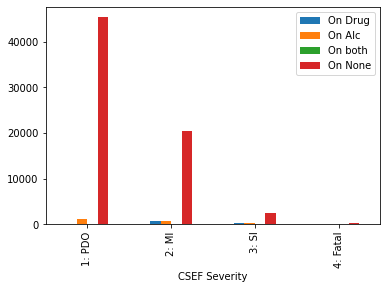

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
crash_result.toPandas().plot(x='CSEF Severity',kind = 'bar')
# drug = crash_result.select('On Drug').Values.toList()
# print(drug)
# Alcohol = crash_result.select('On Alc').collect()
# both = crash_result.select('On Both').collect()
# on_none = crash_result.select('On None').collect()
# x = np.arange(5)
# plt.bar(x, drug,0.35)

# 2.4 RDDs vs DataFrame vs Spark SQL (20	%) 
Implement the following queries using RDDs, DataFrames and SparkSQL separately. Log the time taken for each query in each approach using the “%%time” built-in magic command in Jupyter Notebook and discuss the performance difference of these 3 approaches. 



1.	Find the Date  and Time of Crash, Number of Casualties in each unit and the Gender, Age, License Type of the unit driver for the suburb "Adelaide".

In [89]:
from pyspark.sql.functions import concat_w

In [169]:
%%time
df_crash_unit.filter(col('Suburb') == 'ADELAIDE')\
    .withColumn('Date',concat_ws('-',df_crash_unit['Year'],df_crash_unit['Month'],df_crash_unit['Day']))\
    .select('Date','Time','Total Cas','Sex','Age','Licence Type').show(10)

+--------------------+--------+---------+-------+---+------------+
|                Date|    Time|Total Cas|    Sex|Age|Licence Type|
+--------------------+--------+---------+-------+---+------------+
|2016-November-Wed...|01:45 pm|        1|   Male|056|        Full|
|2016-November-Wed...|01:45 pm|        1|   Male|072|        null|
|2016-November-Tue...|03:40 pm|        1|   Male|056|        null|
|2016-November-Tue...|03:40 pm|        1| Female|027|        null|
|2016-November-Tue...|05:00 pm|        0| Female|032|        Full|
|2016-November-Tue...|05:00 pm|        0|Unknown|XXX|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|022|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|020|     Unknown|
|2016-November-Monday|11:26 pm|        0|Unknown|XXX|     Unknown|
|2016-November-Monday|11:26 pm|        0|   Male|042|        Full|
+--------------------+--------+---------+-------+---+------------+
only showing top 10 rows

CPU times: user 7.29 ms, sys: 0 ns, 

In [120]:
rdd_join_unit_crash = rdd_units.map(lambda x:x.split(',')).map(lambda x:(x[0],x[1:]))\
    .join(rdd_crash.map(lambda x:x.split(',')).map(lambda x:(x[0],x[1:])))
rdd_join_unit_crash.take(10)

[('2016-13-15/08/2019',
  (['01',
    '0',
    'SA',
    'Station Wagon',
    '2014',
    'North East',
    'Female',
    '071',
    'SA',
    'C ',
    'Full',
    'Not Towing',
    'Straight Ahead',
    '003',
    'XXXX',
    '',
    ''],
   ['2 Metropolitan',
    'CHAIN OF PONDS',
    '5231',
    'THE ADELAIDE HILLS COUNCIL',
    '2',
    '0',
    '0',
    '0',
    '0',
    '2016',
    'November',
    'Tuesday',
    '10:00 am',
    '100',
    'T-Junction',
    'CURVED',
    ' VIEW OBSCURED',
    'Slope',
    'Not Applicable',
    'Sealed',
    'Dry',
    'Not Raining',
    'Daylight',
    'Rear End',
    '02',
    'Driver Rider',
    '1: PDO',
    'Stop Sign',
    '',
    '',
    '1350159.92',
    '1681400.52',
    '13501601681401'])),
 ('2016-13-15/08/2019',
  (['02',
    '0',
    'SA',
    'Motor Cars - Sedan',
    '2015',
    'North East',
    'Female',
    '059',
    'UNKNOWN',
    'C ',
    'Full',
    'Not Towing',
    'Straight Ahead',
    '001',
    'XXXX',
    '',
    ''],


In [204]:
%%time
rdd_join = rdd_join_unit_crash.filter(lambda x:x[1][1][1]=='ADELAIDE').map(lambda x:(x[0],x[1]))
rdd_join.map(lambda field: (field[1][1][9]  + "-" + field[1][1][10] + "-" + field[1][1][11]\
                                    , field[1][1][12], field[1][1][5], field[1][0][6], field[1][0][7]\
                                    , field[1][0][10]) ).take(10)

CPU times: user 12.8 ms, sys: 4.49 ms, total: 17.3 ms
Wall time: 216 ms


[('2016-November-Wednesday', '04:26 pm', '0', 'Male', '017', 'Unknown'),
 ('2016-November-Wednesday', '04:26 pm', '0', 'Male', '025', 'Unknown'),
 ('2016-December-Friday', '11:30 am', '0', 'Male', '080', 'Full'),
 ('2016-December-Friday', '11:30 am', '0', 'Male', '048', 'Full'),
 ('2016-December-Saturday', '07:40 am', '0', 'Male', '032', 'Full'),
 ('2016-December-Saturday', '07:40 am', '0', 'Unknown', 'XXX', 'Unknown'),
 ('2016-December-Friday', '05:30 pm', '0', 'Female', '058', 'Full'),
 ('2016-December-Friday', '05:30 pm', '0', 'Male', '041', 'Full'),
 ('2016-December-Wednesday', '04:20 pm', '0', 'Female', '045', 'Full'),
 ('2016-December-Wednesday', '04:20 pm', '0', 'Male', '027', 'Full')]

In [87]:
df_crash_unit.createOrReplaceTempView("sql_events")

In [215]:
%%time
spark.sql(
    '''
    select Year || '-' || Month || '-' || Day as Date, Time, `Total Cas`, Sex, Age, `Licence Type` 
    from sql_events
    where Suburb = 'ADELAIDE'
    ''').show(10)

+--------------------+--------+---------+-------+---+------------+
|                Date|    Time|Total Cas|    Sex|Age|Licence Type|
+--------------------+--------+---------+-------+---+------------+
|2016-November-Wed...|01:45 pm|        1|   Male|056|        Full|
|2016-November-Wed...|01:45 pm|        1|   Male|072|        null|
|2016-November-Tue...|03:40 pm|        1|   Male|056|        null|
|2016-November-Tue...|03:40 pm|        1| Female|027|        null|
|2016-November-Tue...|05:00 pm|        0| Female|032|        Full|
|2016-November-Tue...|05:00 pm|        0|Unknown|XXX|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|022|     Unknown|
|2016-November-Tue...|05:40 pm|        0|   Male|020|     Unknown|
|2016-November-Monday|11:26 pm|        0|Unknown|XXX|     Unknown|
|2016-November-Monday|11:26 pm|        0|   Male|042|        Full|
+--------------------+--------+---------+-------+---+------------+
only showing top 10 rows

CPU times: user 1.33 ms, sys: 157 µs

DF(411ms)>SQL(378ms)>RDD(216ms)

2.	Find the total number of casualties for each suburb when the vehicle was driven by an unlicensed driver. You are required to display the name of the suburb and the total number of casualties. 

In [167]:
%%time
df_crash_unit.filter(col('Licence Type') == 'Unlicenced')\
    .groupBy('Suburb')\
    .agg(F.sum('Total Cas').alias('Total'))\
    .orderBy('Suburb',ascending = True).show(5)


+--------------+-----+
|        Suburb|Total|
+--------------+-----+
|ABERFOYLE PARK|  1.0|
|      ADELAIDE| 19.0|
|   ALBERT PARK|  2.0|
|      ALBERTON|  2.0|
|       ALDINGA|  3.0|
+--------------+-----+
only showing top 5 rows

CPU times: user 73 µs, sys: 4.32 ms, total: 4.4 ms
Wall time: 1.3 s


In [163]:
%%time
rdd_join_unit_crash.filter(lambda x:x[1][0][10] == 'Unlicenced')\
    .map(lambda x:(x[1][1][1],int(x[1][1][5])))\
    .reduceByKey(lambda x,y:x+y)\
    .sortByKey().take(5)
                                                             


CPU times: user 36.4 ms, sys: 3.58 ms, total: 40 ms
Wall time: 1.94 s


[('ABERFOYLE PARK', 1),
 ('ADELAIDE', 19),
 ('ALBERT PARK', 2),
 ('ALBERTON', 2),
 ('ALDINGA', 3)]

In [168]:
%%time
spark.sql(
    '''
    select Suburb, sum(`Total Cas`) as Total 
    from sql_events 
    where `Licence Type` = "Unlicenced" 
    group by Suburb 
    order by Suburb
    '''
).show(5)

+--------------+-----+
|        Suburb|Total|
+--------------+-----+
|ABERFOYLE PARK|  1.0|
|      ADELAIDE| 19.0|
|   ALBERT PARK|  2.0|
|      ALBERTON|  2.0|
|       ALDINGA|  3.0|
+--------------+-----+
only showing top 5 rows

CPU times: user 1.46 ms, sys: 161 µs, total: 1.62 ms
Wall time: 1.33 s


RDD(1.94s) > SQL(1.33s) >DF(1.31s)